In [141]:
# Get rid of code on export


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Tours breakdown
Finally the tour breakdown where it can viewed the tour lenght pd and the distribution over year.

Total tours done:      79 tours (17.36% of the 455 total)
Total time:            294h
Average time per tour: 3.73h
Total tips:            660€
Average tip per tour:  8.35€

### Courses ###
Total courses: 17
Total time:    55.14h
Average time per course: 3.24h (including setup and tear down)


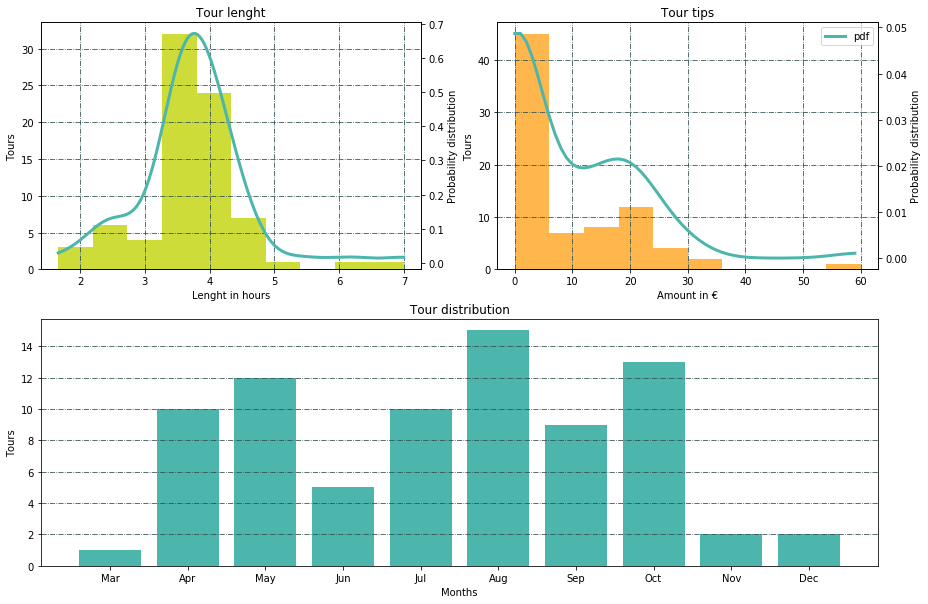

In [142]:
# Set tour id 6788 as cancelled
pt.loc[pt[pt['id'] == 6788].index, 'details'] = 'reu tourne'

# exclude entries with the following words
filter_out = (
    pt['details'].str.contains(
        'details|cancelled|description|imprimir|cursillo|reu tourne|' +
        'course|cursillito|dispo|failed|cusillo|print|analysis|' +
        'management', 
        na=False))

filter_in_courses = (
    pt['details'].str.contains(
        'cursillo|course|cursillito|cusillo', 
        na=False))
filter_out_courses = (
    pt['details'].str.contains(
        'script|review|imprimir', 
        na=False))

# Get courses data
courses = pt[(pt['name'] == 'OpK.Tourne.2018') & (filter_in_courses) & ~(filter_out_courses)]

# Get the tour df and get times
tours = pt[(pt['name'] == 'OpK.Tourne.2018') & ~(filter_out)]
times = tours['lenght'] / 3600

# Process tips
tipsDF = pd.read_csv('tips.csv')
tipsDF['date'] = pd.to_datetime(tipsDF['date'])

# Merge Tours with tips and drop out duplicates
tours_tips = pd.merge(tipsDF, tours, left_on='date', right_on='started', how='inner')
#tours_tips[tours_tips.duplicated(subset='details', keep=False)]  # used to find duplicates
tours_tips = tours_tips.drop([20, 21, 36, 37, 38, 44, 45, 71, 72, 76, 77, 79, 81])


# Print some global numbers
t_done = pt[(pt['name'] == 'OpK.Tourne.2018') & ~(filter_out)]['id'].count()
print('Total tours done:      %s tours (%s%% of the 455 total)' % 
      (t_done, round(t_done * 100 / 455, 2)))
print('Total time:            %sh' % int(times.sum()))
print('Average time per tour: %sh' % round(times.mean(), 2))
print('Total tips:            %s€' % tours_tips['tip'].sum())
print('Average tip per tour:  %s€\n' % round(tours_tips['tip'].mean(), 2))
print('### Courses ###')
print('Total courses: %s' % courses['id'].count())
print('Total time:    %sh' % round(courses['lenght'].sum() / 3600, 2))
print('Average time per course: %sh (including setup and tear down)' %
      round(courses['lenght'].mean() / 3600, 2))

# fig, ax = plt.subplots(2, 2, figsize=(15, 6))
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(221)  # upper left, tour lenght
ax2 = plt.subplot(222)  # upper right, tour tips
ax3 = plt.subplot(212)  # Lower graph, tour distribution

# First plot a binned chart for upper graphs
ax1.hist(times, color=cr['bar3'], )
utils.set_features(ax1, 'Tour lenght', 'Lenght in hours', 'Tours', 'both')
ax2.hist(tours_tips['tip'], color=cr['bar4'], )
utils.set_features(ax2, 'Tour tips', 'Amount in €', 'Tours', 'both')

# the probability distribution for tours
ax1t = ax1.twinx()
pdf = gaussian_kde(times)
x1 = np.arange(times.min(), times.max(), 0.01)
ax1t.plot(x1, pdf(x1), color=cr['bar2'], linewidth=3, label='pdf')
ax1t.set_ylabel('Probability distribution')

# and the probability distribution for tips
ax2t = ax2.twinx()
pdf = gaussian_kde(tours_tips['tip'])
x2 = np.arange(tours_tips['tip'].min(), tours_tips['tip'].max(), 1)
ax2t.plot(x2, pdf(x2), color=cr['bar2'], linewidth=3, label='pdf')
ax2t.set_ylabel('Probability distribution')

# Finally the tour distribution over year
bars = pt[(pt['name'] == 'OpK.Tourne.2018') & ~(filter_out)].groupby('month')['id'].count()
ax3.bar(bars.index, bars, color=cr['bar2'])
ax3.set_xticks(bars.index)
ax3.set_xticklabels(month_abbr[3:13])
utils.set_features(ax3, 'Tour distribution', 'Months', 'Tours',)

plt.legend()
plt.show()